# 03 - Similarity Scores Over Development

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load All Data

In [2]:
mooney_comparisons = pd.read_csv('D:\\Juveniles\\triplet_loss_embeddings\\duke_emds_to_self.csv').drop(columns = 'Unnamed: 0')
utsw_comparisons = pd.read_csv('D:\\Juveniles\\triplet_loss_embeddings\\utsw_emds_to_self.csv').drop(columns = 'Unnamed: 0')
utsw_comparisons_extra = pd.read_csv('D:\\Juveniles\\triplet_loss_embeddings\\utsw_emds_to_self_more.csv').drop(columns = 'Unnamed: 0')

utsw_comparisons = pd.concat([utsw_comparisons, utsw_comparisons_extra])

In [3]:
utsw_comparisons['Colony'] = 'UTSW'
mooney_comparisons['Colony'] = 'Duke'

all_comparisons = pd.concat([mooney_comparisons, utsw_comparisons])

In [4]:
all_comparisons.groupby(['Bird_ID', 'Colony']).count()

,,Comparison_Bird_ID,Tutor_ID,Age,EMD
Bird_ID,Colony,,,,
G266,UTSW,26,26,26,26
R262,UTSW,21,21,21,21
R265,UTSW,6,6,6,6
S264,UTSW,4,4,4,4
S856,UTSW,7,7,7,7
Y856,UTSW,4,4,4,4
grn394,Duke,5,5,5,5
grn395,Duke,5,5,5,5
grn397,Duke,5,5,5,5


In [5]:
all_comparisons.head()

,Bird_ID,Comparison_Bird_ID,Tutor_ID,Age,EMD,Colony
0,grn394,grn394_100,grn394_100,58,0.641362,Duke
1,grn394,grn394_100,grn394_100,70,0.363938,Duke
2,grn394,grn394_100,grn394_100,90,0.301980,Duke
3,grn394,grn394_100,grn394_100,80,0.333505,Duke
4,grn394,grn394_100,grn394_100,100,0.157172,Duke


In [6]:
pd.DataFrame(all_comparisons.groupby('Comparison_Bird_ID')['Age'].apply(list))

,Age
Comparison_Bird_ID,
G266_99,"[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7..."
R262_102,"[61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 7..."
R265_100,"[60, 62, 63, 65, 92, 100]"
S264_99,"[59, 60, 99, 100]"
S856_90,"[50, 51, 55, 60, 69, 80, 90]"
Y856_90,"[50, 55, 60, 90]"
grn394_100,"[58, 70, 90, 80, 100]"
grn395_94,"[63, 70, 90, 80, 94]"
grn397_94,"[62, 70, 90, 80, 94]"


drop comparisons to same day as these are artificially low

In [6]:
all_comparisons['Comparison_age'] = [int(x.split('_')[-1]) for x in all_comparisons.Tutor_ID]

In [7]:
all_comparisons = all_comparisons[all_comparisons.Age != all_comparisons.Comparison_age]

<Axes: xlabel='Age', ylabel='EMD'>

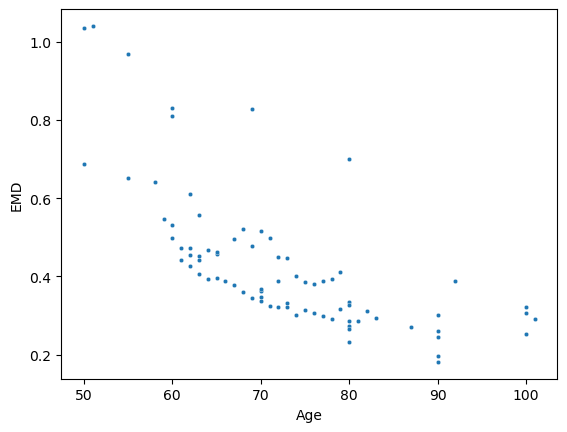

In [8]:
plt.figure(facecolor='white')
sns.scatterplot(data = all_comparisons, x = 'Age', y = 'EMD', legend = False, s = 10)

## Fit an Exponential Function to Data

In [9]:
def exponential_decay(x, a, b, c):
    return a * np.exp(-b * (x - 50)) + c

In [10]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(exponential_decay, all_comparisons.Age, all_comparisons.EMD, p0 = [0.5, 0.5, 0.2])

In [11]:
popt

array([0.69175547, 0.07874548, 0.26051732])

In [12]:
x_plot = np.linspace(min(all_comparisons.Age), max(all_comparisons.Age), 100)
y_plot = exponential_decay(x_plot, *popt)

In [13]:
plt.rcParams.update({'font.size': 8})

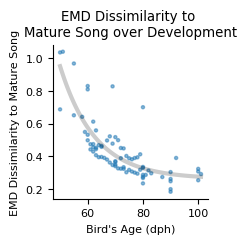

In [17]:
plt.figure(figsize = (2,2))
plt.scatter(all_comparisons.Age, all_comparisons.EMD,
            sizes = np.ones_like(all_comparisons.Age) * 5, alpha = 0.5)

plt.plot(x_plot, y_plot, color = 'black', alpha = 0.2, linewidth = 3 )

plt.xlabel("Bird's Age (dph)")
plt.ylabel("EMD Dissimilarity to Mature Song")
plt.title('EMD Dissimilarity to \nMature Song over Development')
sns.despine()
plt.savefig('emds_over_development.svg', transparent = True)

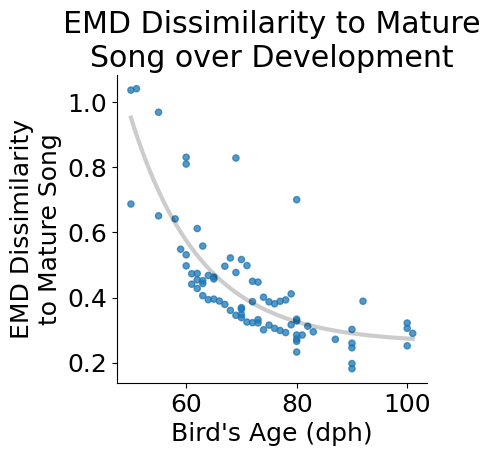

In [21]:
plt.rcParams.update({'font.size': 18})

plt.figure(figsize = (4,4))
plt.scatter(all_comparisons.Age, all_comparisons.EMD,
            sizes = np.ones_like(all_comparisons.Age) * 20, alpha = 0.75)

plt.plot(x_plot, y_plot, color = 'black', alpha = 0.2, linewidth = 3 )

plt.xlabel("Bird's Age (dph)")
plt.ylabel("EMD Dissimilarity\nto Mature Song")
plt.title('EMD Dissimilarity to Mature\nSong over Development')
sns.despine()
plt.savefig('poster_emds_over_development.svg')

In [23]:
all_comparisons.head()

,Bird_ID,Comparison_Bird_ID,Tutor_ID,Age,EMD,Colony,Comparison_age
0,grn394,grn394_100,grn394_100,58,0.641362,Duke,100
1,grn394,grn394_100,grn394_100,70,0.363938,Duke,100
2,grn394,grn394_100,grn394_100,90,0.301980,Duke,100
3,grn394,grn394_100,grn394_100,80,0.333505,Duke,100
5,grn395,grn395_94,grn395_94,63,0.557933,Duke,94


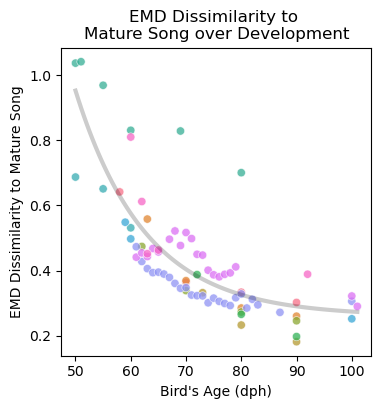

In [26]:
plt.figure(figsize = (4,4))
sns.scatterplot(data = all_comparisons, x = 'Age', y = 'EMD', hue = 'Bird_ID', legend = False, alpha = 0.75)

plt.plot(x_plot, y_plot, color = 'black', alpha = 0.2, linewidth = 3 )

plt.xlabel("Bird's Age (dph)")
plt.ylabel("EMD Dissimilarity to Mature Song")
plt.title('EMD Dissimilarity to \nMature Song over Development')
plt.show()